In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('dataset_1_3_removedzero.csv')

In [4]:
l = list(range(1,41))
np.random.seed(101)
row_blind = list(np.random.randint(1,40,5))
row_blind
row_rem = []
for item in l:
    if item not in row_blind :
        row_rem.append(item)

df_three = df[df['Label']==-1]
df_three.index

index_three = list(df_three.index)
index_three 

print(index_three)

##generate 4 random indices that will serve as location to the list index_three for blind set
np.random.seed(0)
indices_blind = list(np.random.randint(1,len(index_three),4))

print(indices_blind)

##for the blind index get the 5 rows for the blind set having label 3
row_blind_three=[]
for index in indices_blind:
    row_blind_three.append(index_three[index])
    
print(row_blind_three)

##get the remaining rows having label3 which do not form the blind set 
row_rem_three=[]
for item in index_three:
    if item not in indices_blind:
        row_rem_three.append(item)
        
print(row_rem_three)


df_one = df[df['Label']==1]
df_one.index

index_one = list(df_one.index)
index_one

print(index_one)

##generate 2 random indices that will serve as location to the list index_one for blind set
np.random.seed(101)
indices_blind = list(np.random.randint(1,len(index_one),2))

print(indices_blind)

##for the blind index get the 5 rows for the blind set having label 1
row_blind_one=[]
for index in indices_blind:
    row_blind_one.append(index_one[index])
    
print(row_blind_one)

##get the remaining rows having label 1 which do not form the blind set 
row_rem_one=[]
for item in index_one:
    if item not in indices_blind:
        row_rem_one.append(item)
        
print(row_rem_one)

[0, 3, 5, 8, 9, 11, 12, 13, 14, 15, 16, 19, 21, 22, 23, 24, 25, 26, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39]
[13, 16, 22, 1]
[22, 25, 34, 3]
[0, 3, 5, 8, 9, 11, 12, 14, 15, 19, 21, 23, 24, 25, 26, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39]
[1, 2, 4, 6, 7, 10, 17, 18, 20, 27, 30, 31]
[2, 7]
[4, 18]
[1, 4, 6, 10, 17, 18, 20, 27, 30, 31]


In [5]:
# blind3_X = pd.DataFrame(df_three.drop('Label',axis=1),index=row_blind_three)
# blind3_y = pd.DataFrame(df_three['Label'],index=row_blind_three)
# blind1_X = pd.DataFrame(df_one.drop('Label',axis=1),index=row_blind_one)
# blind1_y = pd.DataFrame(df_one['Label'],index=row_blind_one)
# rem3_X = pd.DataFrame(df_three.drop('Label',axis=1),index=row_rem_three)
# rem3_y = pd.DataFrame(df_three['Label'],index=row_rem_three)
# rem1_X = pd.DataFrame(df_one.drop('Label',axis=1),index=row_rem_one)
# rem1_y = pd.DataFrame(df_one['Label'],index=row_rem_one)

In [6]:
row_blind= row_blind_one + row_blind_three

In [7]:
df_blind = pd.DataFrame(df,index=row_blind)

In [8]:
blind_X = df_blind.drop('Label',axis=1)
blind_y = df_blind['Label']

In [9]:
row_rem = row_rem_one + row_rem_three

In [10]:
df_new = pd.DataFrame(df,index=row_rem)

In [11]:
X = df_new.drop('Label',axis=1)
y = df_new['Label']

In [12]:
df_knn = pd.DataFrame(index=range(0,10),columns=['Model_Num','Accuracy','Precision','Recall'])

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [15]:
from sklearn.model_selection import StratifiedKFold

In [16]:
skf=StratifiedKFold(n_splits=10)

In [17]:
skf.get_n_splits(X, y)

10

In [18]:

model_num=-1
model_train={}
model_test={}

for train_index, test_index in skf.split(X, y):
        
    print("TRAIN:", train_index, "TEST:", test_index)

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_num=model_num+1
    
    model_train[model_num]= train_index
    model_test[model_num]= test_index

    
    if(model_num<10):
        
        knn = KNeighborsClassifier(n_neighbors=1)

        knn.fit(X_train,y_train)

        pred = knn.predict(X_test)
        

        print(classification_report(y_test,pred))

        acc = accuracy_score(y_test,pred)
        
        pre = precision_score(y_test,pred)
        
        rec = recall_score(y_test,pred)
        
        cm = confusion_matrix(y_test,pred)
        
        if (np.shape(cm)==(2,2)):
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp/(tp+fn)
            specificity = tn/(tn+fp)
            
        print(model_num)
        print(acc,sensitivity,specificity)
        print('\n')
        
                
        df_knn.iloc[model_num]['Model_Num'] = model_num
        df_knn.iloc[model_num]['Accuracy'] = acc
        df_knn.iloc[model_num]['Precision'] = pre
        df_knn.iloc[model_num]['Recall'] = rec 
  



TRAIN: [ 1  2  3  4  5  6  7  8  9 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34] TEST: [ 0 10 11 12]
              precision    recall  f1-score   support

          -1       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1

   micro avg       0.50      0.50      0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4

0
0.5 0.0 0.6666666666666666


TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34] TEST: [ 1 13 14 15]
              precision    recall  f1-score   support

          -1       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1

   micro avg       0.50      0.50      0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4

1
0.5 0.0 0.6666666666666666


TRAIN: [ 0  1  3  4  5  6  7  8  9 10 

C:\Users\Umaima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Umaima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Umaima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Umaima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Umaima\A


0.6666666666666666 1.0 0.5


TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32] TEST: [ 9 33 34]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

9
1.0 1.0 1.0




In [19]:
model_train

{0: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 1: array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 2: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 3: array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 4: array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 5: array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34]),
 6: array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 29,

In [20]:
model_test

{0: array([ 0, 10, 11, 12]),
 1: array([ 1, 13, 14, 15]),
 2: array([ 2, 16, 17, 18]),
 3: array([ 3, 19, 20, 21]),
 4: array([ 4, 22, 23, 24]),
 5: array([ 5, 25, 26]),
 6: array([ 6, 27, 28]),
 7: array([ 7, 29, 30]),
 8: array([ 8, 31, 32]),
 9: array([ 9, 33, 34])}

In [21]:
df_knn

,Model_Num,Accuracy,Precision,Recall
0,0,0.5,0,0
1,1,0.5,0,0
2,2,0.5,0,0
3,3,0.5,0,0
4,4,1,1,1
5,5,0.666667,0,0
6,6,1,1,1
7,7,0.666667,0,0
8,8,0.666667,0.5,1
9,9,1,1,1


In [22]:
df_knn.to_csv('KNN_10cross.csv',index=False)

In [23]:
maxacc = max(df_knn['Accuracy'])
#print(maxacc)
mn=[]
for i in range(0,10):
    if(df_knn.iloc[i]['Accuracy']==maxacc and df_knn.iloc[i]['Precision']!=0):
        mn.append(df_knn.iloc[i]['Model_Num'])
print(mn)
id=mn[0]

[4, 6, 9]


In [24]:
id

4

In [25]:
model_train[id]

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [26]:
model_test[id]

array([ 4, 22, 23, 24])

In [27]:
blind_X

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,12491,12492,12493,12494,12495,12496,12497,12498,12499,12500
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
blind_y

4     1
18    1
22   -1
25   -1
34   -1
3    -1
Name: Label, dtype: int64

In [29]:
X_tr, X_te = X.iloc[model_train[id]], X.iloc[model_test[id]]
y_tr, y_te = y.iloc[model_train[id]], y.iloc[model_test[id]]

print("TRAIN:",model_train[id] , "TEST:", model_test[id])

bestmodel = KNeighborsClassifier(n_neighbors=1)

bestmodel.fit(X_tr,y_tr)

blind_pred = bestmodel.predict(blind_X)

tn,fp,fn,tp=confusion_matrix(blind_y,blind_pred).ravel()

sens = tp/(tp+fn)
spec = tn/(tn+fp)
ppv = tp/(tp+fp)

print(confusion_matrix(blind_y,blind_pred))

print(classification_report(blind_y,blind_pred))

print('Accuracy :',accuracy_score(blind_y,blind_pred))

print('Sensitivity: ',sens)

print('Specificity: ',spec)

print('Positive Predictive Value: ',ppv)


TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 25 26 27
 28 29 30 31 32 33 34] TEST: [ 4 22 23 24]
[[4 0]
 [0 2]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Accuracy : 1.0
Sensitivity:  1.0
Specificity:  1.0
Positive Predictive Value:  1.0


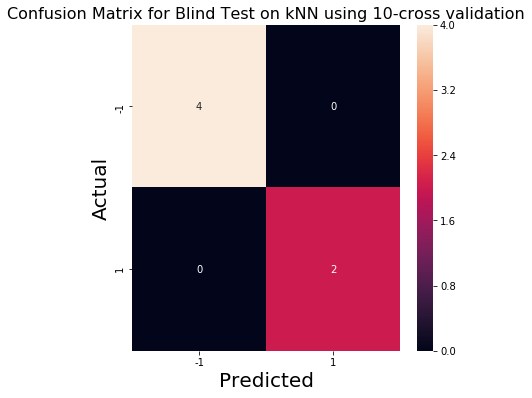

In [30]:
fig=plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(blind_y,blind_pred),annot=True,xticklabels=[-1,1],yticklabels=[-1,1])
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.title('Confusion Matrix for Blind Test on kNN using 10-cross validation',fontsize=16)
fig.savefig('heatmap_10cross_KNN_blind.png',dpi=300)


In [31]:
sum_acc = sum_pre = sum_rec= 0
for i in range(0,10):
    sum_acc =sum_acc + df_knn.iloc[i]['Accuracy']
    sum_pre = sum_pre + df_knn.iloc[i]['Precision']
    sum_rec = sum_rec + df_knn.iloc[i]['Recall']
avg_acc = sum_acc/10
avg_pre = sum_pre/10
avg_rec = sum_rec/10
print(avg_acc)
print(avg_pre)
print(avg_rec)

0.7
0.35
0.4


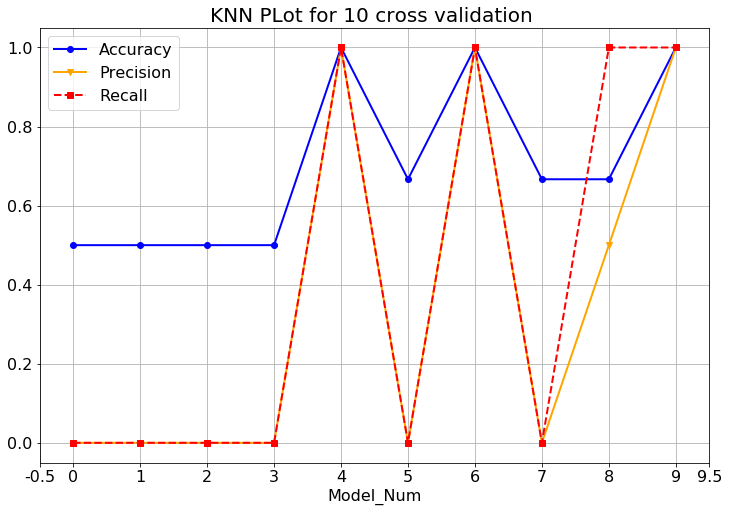

In [32]:
fig=plt.figure(figsize=(12,8))

x = [-0.5,0,1,2,3,4,5,6,7,8,9,9.5]
y = [0.0,0.2,0.4,0.6,0.8,1.0,1.2]
# create an index for each tick position
xi = [i for i in x]
yi = [i for i in y]

# plot the index for the x-values
plt.plot(df_knn['Model_Num'],df_knn['Accuracy'], 'o-' ,color='blue',label='Accuracy', lw=2)
plt.plot(df_knn['Model_Num'],df_knn['Precision'], 'v-', color='orange',label='Precision', lw=2)
plt.plot(df_knn['Model_Num'],df_knn['Recall'], 's--',  color='red',label='Recall', lw=2)

plt.xticks(xi, x,fontsize=16)
plt.yticks(fontsize=16)
plt.title('KNN PLot for 10 cross validation ', fontsize= 20)
plt.xlabel('Model_Num', fontsize= 16)
plt.legend(fontsize= 16) 
plt.grid()
plt.show()
fig.savefig('KNN PLot for 10 cross validation blind.png')